##### UC Berkeley School of Information - Alex S Kim

##### Introduction 

Predicting housing price is crucial for investment decision making process for individuals and assetmanagement firms regarding their background and purpose of investments. With housing price data available including different features, firms and investors seek to find feasible prediction for the price of houses in order to make decision as well as detecting undervalued assets. Moreover, the outcome of the model can be beneficial for firms and individuals to reduce screening costs, reforming existing features of houses to enhance the value of the asset. In this project, we utilize supervised machine learning algorithms and regression techniques to predict houses with given DataSet and features.

The Ames Housing dataset was compiled by Dean De Cock. It's an incredible alternative for data scientists looking for a modernized and expanded version of the often cited Boston Housing dataset.

the dataset contains housing observations for training and test sets (together rough 3000) with 80 different features housing features including price feature detail is explained in the data_descriptiontxt https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data. 

In [431]:
#import packages 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from scipy import stats
from scipy.stats import norm, skew

# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# General libraries.
import re
import matplotlib.pyplot as plt

# SK-learn libraries for learning.
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn import ensemble
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error, r2_score

# SK-learn libraries for evaluation.
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report

# SK-learn libraries for feature extraction from text.
from sklearn.feature_extraction.text import *

from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

# 1. Loading Data, Exploration, Cleaning 

In [496]:
test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')

In [497]:
#1460 observations for both train and test and 80,81 different features 
print(test.shape)
print(train.shape)
train.head()

(1459, 80)
(1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [498]:
#Saving sets sizes, concat sets and dropping target variable
size_df_train = train.shape[0]
size_df_test = test.shape[0]
data = pd.concat((train, test)).reset_index(drop=True)

# Lets check if the ammount of null values in data
data.count().sort_values()

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



PoolQC             10
MiscFeature       105
Alley             198
Fence             571
SalePrice        1460
FireplaceQu      1499
LotFrontage      2433
GarageFinish     2760
GarageQual       2760
GarageCond       2760
GarageYrBlt      2760
GarageType       2762
BsmtCond         2837
BsmtExposure     2837
BsmtQual         2838
BsmtFinType2     2839
BsmtFinType1     2840
MasVnrType       2895
MasVnrArea       2896
MSZoning         2915
BsmtHalfBath     2917
Utilities        2917
Functional       2917
BsmtFullBath     2917
GarageCars       2918
GarageArea       2918
Electrical       2918
Exterior1st      2918
KitchenQual      2918
SaleType         2918
                 ... 
OverallQual      2919
MSSubClass       2919
Heating          2919
LotShape         2919
2ndFlrSF         2919
3SsnPorch        2919
BedroomAbvGr     2919
BldgType         2919
CentralAir       2919
Condition1       2919
Condition2       2919
EnclosedPorch    2919
ExterCond        2919
ExterQual        2919
Fireplaces

### Treating Missing Data

In [499]:
#missing data percentage with respect to number of observation
total = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(10)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


In [500]:
#Dropping the variables that has significantly many missing column more 17%
train = train.drop((missing_data[missing_data['Total'] > 81]).index,1)

In [501]:
#Similar Process for the missing data (test set)
total_test = test.isnull().sum().sort_values(ascending=False)
percent_test = (test.isnull().sum()/test.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total_test, percent_test], axis=1, keys=['Total', 'Percent'])
missing_data.head(10)

,Total,Percent
PoolQC,1456,0.997944
MiscFeature,1408,0.965045
Alley,1352,0.926662
Fence,1169,0.801234
FireplaceQu,730,0.500343
LotFrontage,227,0.155586
GarageCond,78,0.053461
GarageQual,78,0.053461
GarageYrBlt,78,0.053461
GarageFinish,78,0.053461


In [502]:
#dealing with missing data - drop
test = test.drop((missing_data[missing_data['Total'] > 78]).index,1)

In [503]:
# Categorical boolean mask -train
categorical_feature_mask = train.dtypes==object
# filter categorical columns using mask and turn it into alist
categorical_cols = train.columns[categorical_feature_mask].tolist()

In [504]:
#non numerical values to qto numerical 
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()
train[categorical_cols] = train[categorical_cols].apply(lambda col: labelencoder.fit_transform(col.astype(str)))

In [505]:
# Categorical boolean mask - test
categorical_feature_mask_test = test.dtypes==object
# filter categorical columns using mask and turn it into alist
categorical_cols_test = test.columns[categorical_feature_mask_test].tolist()

In [506]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
test[categorical_cols_test] = test[categorical_cols_test].apply(lambda col: labelencoder.fit_transform(col.astype(str)))

In [507]:
#missing values with the median value of the variables 
train['GarageYrBlt'] = train['GarageYrBlt'].fillna(train['GarageYrBlt'].median())
train['MasVnrArea'] = train['MasVnrArea'].fillna(train['MasVnrArea'].median())

test['GarageYrBlt'] = test['GarageYrBlt'].fillna(test['GarageYrBlt'].median())
test['MasVnrArea'] = test['MasVnrArea'].fillna(test['MasVnrArea'].median())
test['GarageCars'] = test['GarageCars'].fillna(test['GarageCars'].median())
test['GarageArea'] = test['GarageArea'].fillna(test['GarageArea'].median())
test['BsmtFinSF1'] = test['BsmtFinSF1'].fillna(test['BsmtFinSF1'].median())
test['BsmtUnfSF'] = test['BsmtUnfSF'].fillna(test['BsmtUnfSF'].median())
test['BsmtFinSF2'] = test['BsmtFinSF2'].fillna(test['BsmtFinSF2'].median())
test['BsmtFullBath'] = test['BsmtFullBath'].fillna(test['BsmtFullBath'].median())
test['BsmtHalfBath'] = test['BsmtHalfBath'].fillna(test['BsmtHalfBath'].median())
test['TotalBsmtSF'] = test['TotalBsmtSF'].fillna(test['TotalBsmtSF'].median())

In [508]:
train.head()
test.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,2,11622,1,3,3,0,4,0,...,0,0,0,120,0,0,6,2010,8,4
1,1462,20,3,14267,1,0,3,0,0,0,...,36,0,0,0,0,12500,6,2010,8,4
2,1463,60,3,13830,1,0,3,0,4,0,...,34,0,0,0,0,0,3,2010,8,4
3,1464,60,3,9978,1,0,3,0,4,0,...,36,0,0,0,0,0,6,2010,8,4
4,1465,120,3,5005,1,0,1,0,4,0,...,82,0,0,144,0,0,1,2010,8,4


In [509]:
#getting numerical features and categorical features
numerical_features = train.dtypes[train.dtypes != "object"].index
categorical_features = train.dtypes[train.dtypes == "object"].index

print("We have: ", len(numerical_features), 'Numerical Features')
print("We have: ", len(categorical_features), 'Categorical Features')

numerical_features
categorical_features

We have:  75 Numerical Features
We have:  0 Categorical Features


Index([], dtype='object')

In [510]:
#getting numerical features and categorical features
numerical_features = test.dtypes[test.dtypes != "object"].index
categorical_features = test.dtypes[test.dtypes == "object"].index

print("We have: ", len(numerical_features), 'Numerical Features')
print("We have: ", len(categorical_features), 'Categorical Features')

numerical_features
categorical_features

We have:  74 Numerical Features
We have:  0 Categorical Features


Index([], dtype='object')

In [511]:
#check we do not have missing value anymore - full dataset for test
total_test = test.isnull().sum().sort_values(ascending=False)
percent_test = (test.isnull().sum()/test.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total_test, percent_test], axis=1, keys=['Total', 'Percent'])
missing_data.head(10)

,Total,Percent
SaleCondition,0,0.0
YearRemodAdd,0,0.0
RoofMatl,0,0.0
Exterior1st,0,0.0
Exterior2nd,0,0.0
MasVnrType,0,0.0
MasVnrArea,0,0.0
ExterQual,0,0.0
ExterCond,0,0.0
Foundation,0,0.0


In [512]:
#missing data - fulldata set for train
total = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(10)

,Total,Percent
SalePrice,0,0.0
YearRemodAdd,0,0.0
RoofMatl,0,0.0
Exterior1st,0,0.0
Exterior2nd,0,0.0
MasVnrType,0,0.0
MasVnrArea,0,0.0
ExterQual,0,0.0
ExterCond,0,0.0
Foundation,0,0.0


# 2. EDA with Complete Data Set


 mu = 180921.20 and sigma = 79415.29



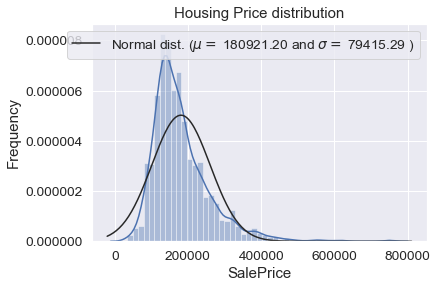

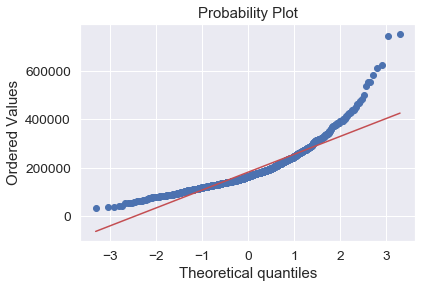

In [513]:
sns.distplot(train['SalePrice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('Housing Price distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show() 


 mu = 12.02 and sigma = 0.40



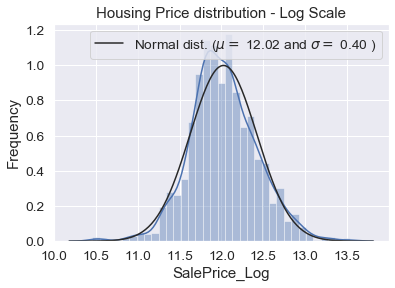

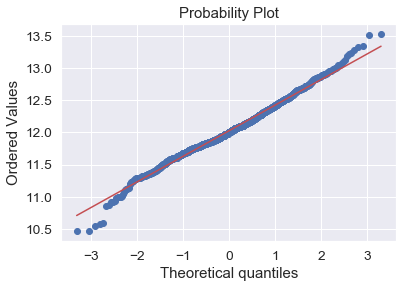

In [514]:
train['SalePrice_Log'] = np.log(train['SalePrice'])

sns.distplot(train['SalePrice_Log'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['SalePrice_Log'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('Housing Price distribution - Log Scale')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train['SalePrice_Log'], plot=plt)
plt.show() 

- Distribution after the log transformation of the SalePrice relatively follows normal distribution 

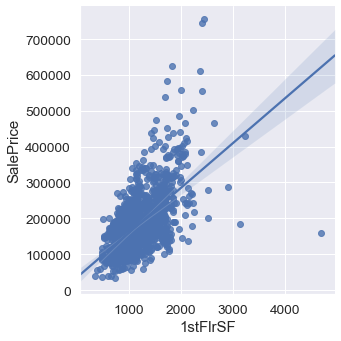

In [515]:
#first floor square feet vs sales price?
sns.lmplot(x='1stFlrSF',y='SalePrice',data=train)

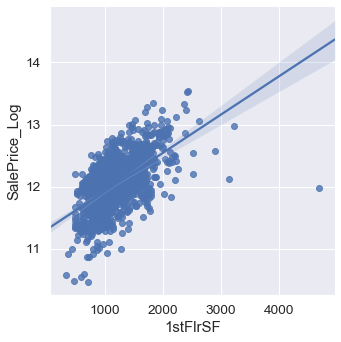

In [516]:
sns.lmplot(x='1stFlrSF',y='SalePrice_Log',data=train)

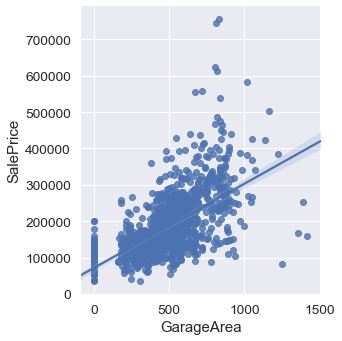

In [517]:
#garage area vs sale price of house? 
sns.lmplot(x='GarageArea',y='SalePrice',data=train)

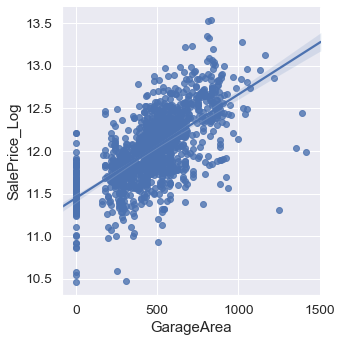

In [518]:
sns.lmplot(x='GarageArea',y='SalePrice_Log',data=train)

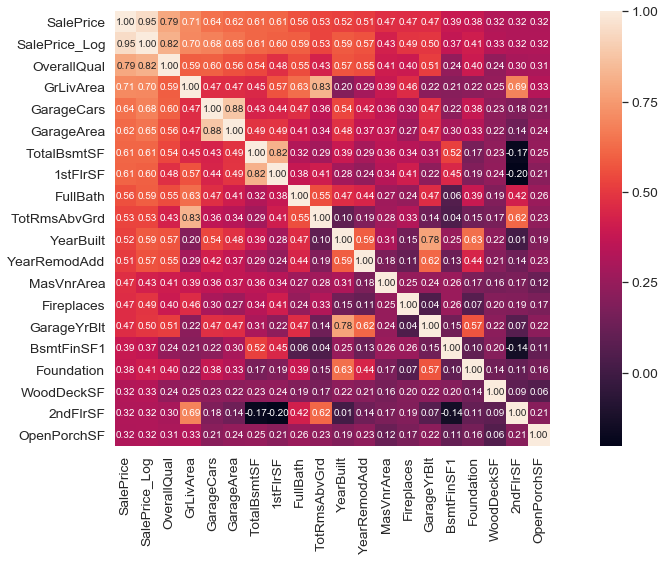

In [519]:
#saleprice correlation matrix
k = 20 #number of variables for heatmap
plt.figure(figsize=(18,8))
corrmat = train.corr()
# picking the top 20 correlated features
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

# 3. Model for regression and Supervised Learning

(In this section we seek to train and test our model with various supervised machine learning algorithms and compare the accuracy estimate using (MAE MSE RMSE). Following the distribution of the dependent variable, SalePrice of housing, we use log scale for predicted outcome.)

In [520]:
#we are going to use SalePrice_Log instead of SalePrice
train = train.drop(['SalePrice'],axis = 1 )
train = train.drop(['Id'],axis = 1 )

In [521]:
train.head()

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice_Log
0,60,3,8450,1,3,3,0,4,0,5,...,0,0,0,0,0,2,2008,8,4,12.247694
1,20,3,9600,1,3,3,0,2,0,24,...,0,0,0,0,0,5,2007,8,4,12.109011
2,60,3,11250,1,0,3,0,4,0,5,...,0,0,0,0,0,9,2008,8,4,12.317167
3,70,3,9550,1,0,3,0,0,0,6,...,272,0,0,0,0,2,2006,8,0,11.849398
4,60,3,14260,1,0,3,0,2,0,15,...,0,0,0,0,0,12,2008,8,4,12.429216


In [522]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train.drop('SalePrice_Log', axis=1), train['SalePrice_Log'], test_size=0.2, random_state=101)

In [523]:
y_train= y_train.values.reshape(-1,1)
y_test= y_test.values.reshape(-1,1)

In [524]:
from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()

#Fit our scaler on our training data. 
#For preprocessing we can transform our test data but should not fit on it
#We have already transformed our y_train/y_test with a log transform
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [525]:
# size of training dataset 
len(y_train)

1168

In [526]:
# size of test dataset for model accuracy
len(X_test)

292

## Linear Regression

In [527]:
#Linear Regression
lm = LinearRegression()
lm.fit(X_train,y_train)
predictions = lm.predict(X_test)
predictions= predictions.reshape(-1,1)

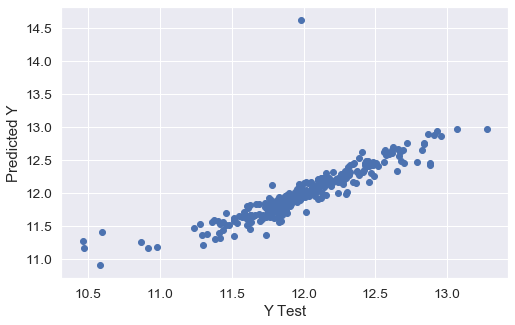

In [528]:
plt.figure(figsize=(8,5))
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

In [529]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.10382330769272478
MSE: 0.04441489927055353
RMSE: 0.21074842649603232


## Support Vector Machine (rbf kernel)

In [530]:
from sklearn.svm import SVR

In [531]:
#SVR 
svr = SVR()
svr = svr.fit(X_train, y_train)
svr.fit(X_train, y_train)
svr.score(X_train, y_train)
svr_pred = svr.predict(X_test)
svr_pred = svr_pred.reshape(-1,1)

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


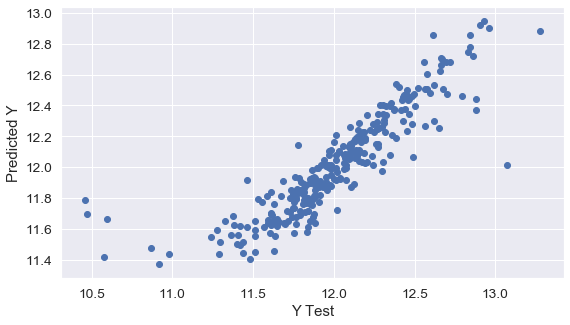

In [532]:
#plot SVR Fit
plt.figure(figsize=(9,5))
plt.scatter(y_test,svr_pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

In [533]:
print('MAE:', metrics.mean_absolute_error(y_test, svr_pred))
print('MSE:', metrics.mean_squared_error(y_test, svr_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, svr_pred)))

MAE: 0.11679678584164997
MSE: 0.041033807998834264
RMSE: 0.20256803301319354


## Decision Tree 

In [534]:
from sklearn.tree import DecisionTreeRegressor
dtreg = DecisionTreeRegressor(random_state = 100)
dtreg = dtreg.fit(X_train, y_train)
dtreg_pred = dtreg.predict(X_test)
dtreg_pred = dtreg_pred.reshape(-1,1)

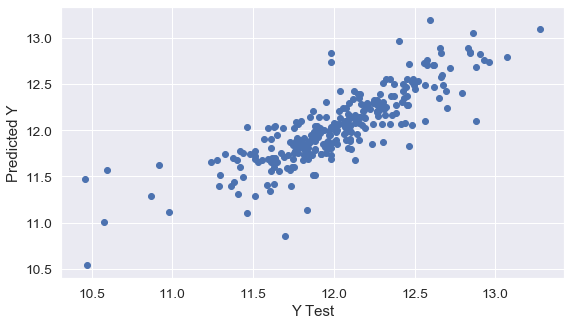

In [535]:
#plot Decision Tree Fit
plt.figure(figsize=(9,5))
plt.scatter(y_test,dtreg_pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

In [536]:
print('MAE:', metrics.mean_absolute_error(y_test, dtreg_pred))
print('MSE:', metrics.mean_squared_error(y_test, dtreg_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, dtreg_pred)))

MAE: 0.1633799847524958
MSE: 0.055136812916419635
RMSE: 0.2348122929414464


## Random Forest

In [537]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators = 500, random_state = 0)
rfr = rfr.fit(X_train, y_train)
rfr_pred = rfr.predict(X_test)
rfr_pred = rfr_pred.reshape(-1,1)

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


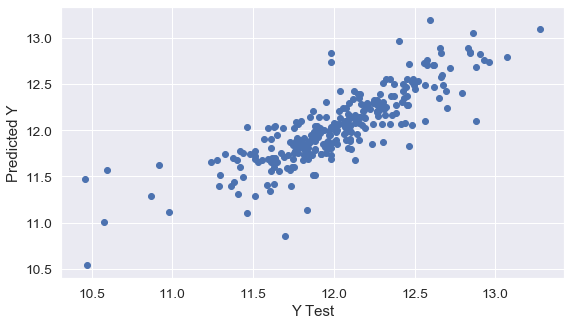

In [538]:
#plot Random Forest Fit
plt.figure(figsize=(9,5))
plt.scatter(y_test,dtreg_pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

In [539]:
print('MAE:', metrics.mean_absolute_error(y_test, rfr_pred))
print('MSE:', metrics.mean_squared_error(y_test, rfr_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, rfr_pred)))

MAE: 0.10423887033064998
MSE: 0.027939109657051642
RMSE: 0.16714996158256107




## Gradient Boosting Model

In [540]:
from sklearn import ensemble
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error, r2_score

In [541]:
params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}
clf = ensemble.GradientBoostingRegressor(**params)

clf.fit(X_train, y_train)

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.01, loss='ls', max_depth=4,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=500,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [542]:
clf_pred=clf.predict(X_test)
clf_pred= clf_pred.reshape(-1,1)

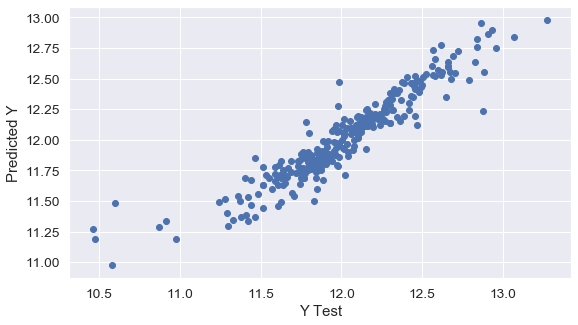

In [543]:
plt.figure(figsize=(9,5))
plt.scatter(y_test,clf_pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

In [544]:
print('MAE:', metrics.mean_absolute_error(y_test, clf_pred))
print('MSE:', metrics.mean_squared_error(y_test, clf_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, clf_pred)))

MAE: 0.09770936111577606
MSE: 0.02315977950828913
RMSE: 0.15218337461197637


## XGBoost Regressor

In [545]:
import xgboost as xgb
xgb = xgb.XGBRegressor(learning_rate=0.01,n_estimators=3460,
                                     max_depth=3, min_child_weight=0,
                                     gamma=0, subsample=0.7,
                                     colsample_bytree=0.7,
                                     objective='reg:linear', nthread=-1,
                                     scale_pos_weight=1, seed=27,
                                     reg_alpha=0.00006)
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)
xgb_pred = xgb_pred.reshape(-1,1)

[17:27:00] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


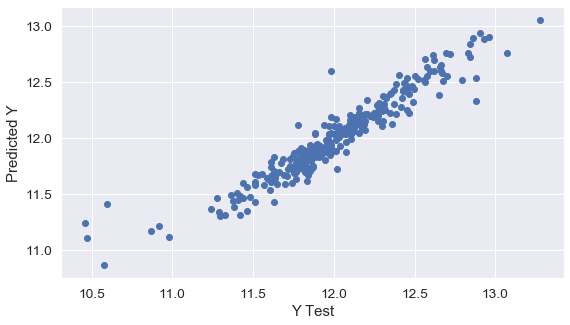

In [546]:
plt.figure(figsize=(9,5))
plt.scatter(y_test,xgb_pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

In [547]:
print('MAE:', metrics.mean_absolute_error(y_test, xgb_pred))
print('MSE:', metrics.mean_squared_error(y_test, xgb_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, xgb_pred)))

MAE: 0.08275343005366396
MSE: 0.017762086836972127
RMSE: 0.13327447931607958


## Model Comparison 

In [548]:
#root mean square error - Variance of the ln(House) = (0.4)**2 = 0.16
print('Linear:',np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('SVM:',np.sqrt(metrics.mean_squared_error(y_test, svr_pred)))
print('Decision Tree:',np.sqrt(metrics.mean_squared_error(y_test, dtreg_pred)))
print('Random Forest:',np.sqrt(metrics.mean_squared_error(y_test, rfr_pred)))
print('Gradient Boosting:',np.sqrt(metrics.mean_squared_error(y_test, clf_pred)))
print('XGBoost:',np.sqrt(metrics.mean_squared_error(y_test, xgb_pred)))

Linear: 0.21074842649603232
SVM: 0.20256803301319354
Decision Tree: 0.2348122929414464
Random Forest: 0.16714996158256107
Gradient Boosting: 0.15218337461197637
XGBoost: 0.13327447931607958


RMSE of model outcome when we do not use the LogScale, XGBoost perform better. 

- Linear: 48582.75232970261
- SVM: 78697.21153494784
- Decision Tree: 33506.0066433096
- Random Forest: 32116.3156513392
- Gradient Boosting: 27034.24306293635
- XGBoost: 25446.857883361594

---------------------
Without Log Transform Y (target), but scaled to account for RMSE difference with LOG:
- Linear: 0.18833629640074784
- SVM: 0.42009453851958767
- Decision Tree: 0.21568068127232093
- Random Forest: 0.17296804347968917
- Gradient Boosting: 0.15413336422459958
- XGBoost: 0.13506182609678838

In [ ]:
example np.sqrt(metrics.mean_squared_error(np.log(y_test), np.log(predictions))))

(XGBoost Perform the best among other Machine Learning Algorithms, we use the XGBoost for House Price Prediction model)

## Feature Importance

In [479]:
#Feature Importance in Gradient Boosting Generally, importance provides a score that indicates how useful or valuable each feature was in the construction of the boosted decision trees within the model. The more an attribute is used to make key decisions with decision trees, the higher its relative importance.
important_vars = xgb.feature_importances_
var_dict = {}
for i, col in enumerate(train.columns[0:-1]):
    var_dict[col] = important_vars[i]
    
for var in sorted(var_dict, key=var_dict.get, reverse=True):
    print(var,':', var_dict[var])

GarageCars : 0.11763447
OverallQual : 0.08268143
GarageFinish : 0.08172382
GarageType : 0.068403006
GrLivArea : 0.06121729
TotalBsmtSF : 0.047752745
Fireplaces : 0.041488964
BsmtQual : 0.03793711
CentralAir : 0.03314227
KitchenQual : 0.023220552
BsmtFinSF1 : 0.02188748
YearRemodAdd : 0.020916253
FullBath : 0.018119283
YearBuilt : 0.015402708
OverallCond : 0.014769327
MSZoning : 0.013121826
BsmtFinType1 : 0.012464889
GarageArea : 0.012462864
PavedDrive : 0.012315919
Functional : 0.0123120025
ExterQual : 0.011016458
Heating : 0.010661187
SaleCondition : 0.010565709
LotArea : 0.009003056
KitchenAbvGr : 0.008704389
OpenPorchSF : 0.008213077
1stFlrSF : 0.0069573233
ExterCond : 0.0067427084
HeatingQC : 0.006578413
PoolArea : 0.006517969
BsmtFullBath : 0.006499878
BsmtExposure : 0.006271161
TotRmsAbvGrd : 0.006186396
ScreenPorch : 0.006090214
2ndFlrSF : 0.005872411
Condition1 : 0.005609004
Condition2 : 0.005357456
GarageYrBlt : 0.0052403137
WoodDeckSF : 0.005113624
YrSold : 0.005054342
LotSha

In [213]:
import shap as shap
df_plot = pd.DataFrame(X_train, columns = train.columns[:-1])

Setting feature_perturbation = "tree_path_dependent" because no background data was given.


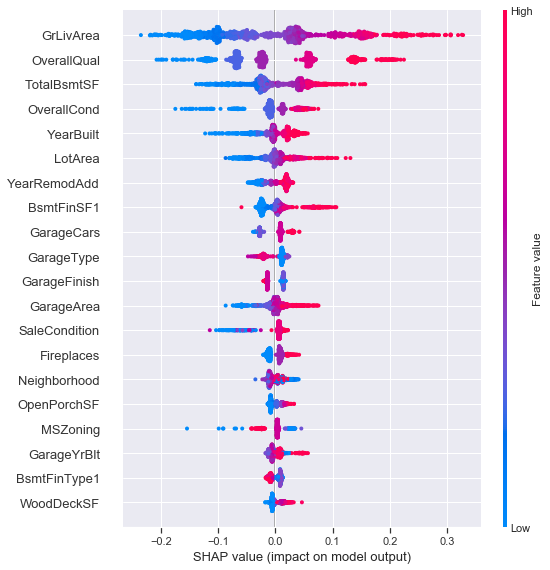

In [214]:
#SHAP plot can be used in any tree based algorithms 
shap_values= shap.TreeExplainer(xgb).shap_values(df_plot)
shap.summary_plot(shap_values,df_plot)

# Predictions 

In [430]:
test1 = test.drop(['Id'],axis = 1 )
test1.head()

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,2,11622,1,3,3,0,4,0,12,...,0,0,0,120,0,0,6,2010,8,4
1,20,3,14267,1,0,3,0,0,0,12,...,36,0,0,0,0,12500,6,2010,8,4
2,60,3,13830,1,0,3,0,4,0,8,...,34,0,0,0,0,0,3,2010,8,4
3,60,3,9978,1,0,3,0,4,0,8,...,36,0,0,0,0,0,6,2010,8,4
4,120,3,5005,1,0,1,0,4,0,22,...,82,0,0,144,0,0,1,2010,8,4


In [373]:
test_processed = sc_X.transform(test1)

In [374]:
test_prediction_xgboost = xgb.predict(test_processed)
test_prediction_xgboost = test_prediction_xgboost.reshape(-1,1)

In [375]:
b = pd.DataFrame(test_prediction_xgboost, columns=['SalePrice_Log'])
b['SalePrice'] = np.exp(b['SalePrice_Log'])
b.head()

,SalePrice_Log,SalePrice
0,11.714355,122314.945312
1,11.998051,162437.843750
2,12.111361,181926.953125
3,12.157278,190475.343750
4,12.163483,191660.843750


In [376]:
b['Id'] = test['Id'].values
b.head()

,SalePrice_Log,SalePrice,Id
0,11.714355,122314.945312,1461
1,11.998051,162437.843750,1462
2,12.111361,181926.953125,1463
3,12.157278,190475.343750,1464
4,12.163483,191660.843750,1465


# Interactive Module

In [464]:
#how the price would change if a feature of the house changes? 
test.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,2,11622,1,3,3,0,4,0,...,0,0,0,120,0,0,6,2010,8,4
1,1462,20,3,14267,1,0,3,0,0,0,...,36,0,0,0,0,12500,6,2010,8,4
2,1463,60,3,13830,1,0,3,0,4,0,...,34,0,0,0,0,0,3,2010,8,4
3,1464,60,3,9978,1,0,3,0,4,0,...,36,0,0,0,0,0,6,2010,8,4
4,1465,120,3,5005,1,0,1,0,4,0,...,82,0,0,144,0,0,1,2010,8,4


In [485]:
#Suppose I'm the house owner of the 
smalldf = test.copy().iloc[0:1]
b1= b.iloc[0:1]
smalldf

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,2,11622,1,3,3,0,4,0,...,0,0,0,120,0,0,6,2010,8,4


In [550]:
print(smalldf['GrLivArea'])
print(smalldf['YearBuilt'])
print(smalldf['TotalBsmtSF'])
b1['SalePrice']

0    896
Name: GrLivArea, dtype: int64
0    1961
Name: YearBuilt, dtype: int64
0    882.0
Name: TotalBsmtSF, dtype: float64


0    122314.945312
Name: SalePrice, dtype: float32

In [370]:
from ipywidgets import interact, widgets

var = 'GrLivArea'
var2 = 'YearBuilt'
var3 =  'TotalBsmtSF'
def myfunc(GrLivArea, Year_Built, TotalBsmtSF):
    smalldf = test1.copy().iloc[0:1]
    smalldf[var] = GrLivArea
    smalldf[var2] = Year_Built
    smalldf[var3] = TotalBsmtSF
    proc = sc_X.transform(smalldf)
    
    return np.exp(xgb.predict(proc))[0]

val = interact(myfunc, 
               GrLivArea=widgets.IntSlider(min = train[var].min(), max = train[var].max()), 
               Year_Built=widgets.IntSlider(min = train[var2].min(), max = train[var2].max()),
               TotalBsmtSF=widgets.IntSlider(min = train[var3].min(), max = train[var3].max())
              )



interactive(children=(IntSlider(value=334, description='GrLivArea', max=5642, min=334), IntSlider(value=1872, …

In [ ]:
#for Home 1461
#896 GrLivArea, 
#1961 YearBuilt, 
#882.0 TotalBsmtSF

In [461]:
#Effect of average price?, the variable changes with respect to entire testset.
#useful if we want to know average home price varying TotalBsmentSF 
from ipywidgets import interact, widgets

var = 'GrLivArea'
var2 = 'YearBuilt'
var3 =  'TotalBsmtSF'
home_idx = None 

def myfunc(TotalBsmtSF):
    
    if home_idx is not None:    
        smalldf = test1.copy().iloc[home_idx:home_idx+1]
    else:
        smalldf = test1.copy()
    smalldf[var3] = TotalBsmtSF
    proc = sc_X.transform(smalldf)
    house_pred = np.exp(xgb.predict(proc))
    return sum(house_pred)/len(house_pred)

val = interact(myfunc, 
               TotalBsmtSF=widgets.IntSlider(min = train[var3].min(), max = train[var3].max())
              )

interactive(children=(IntSlider(value=0, description='TotalBsmtSF', max=6110), Output()), _dom_classes=('widge…

In [365]:
from ipywidgets import interact, widgets

var = 'GrLivArea'
var2 = 'YearBuilt'
var3 =  'TotalBsmtSF'

home_idx = None 

def myfunc(GrLivArea, Year_Built, TotalBsmtSF):
    
    if home_idx is not None:    
        smalldf = test1.copy().iloc[home_idx:home_idx+1]
    else:
        smalldf = test1.copy()
    smalldf[var] = GrLivArea
    smalldf[var2] = Year_Built
    smalldf[var3] = TotalBsmtSF
    proc = sc_X.transform(smalldf)
    house_pred = np.exp(xgb.predict(proc))
    return sum(house_pred)/len(house_pred)

val = interact(myfunc, 
               GrLivArea=widgets.IntSlider(min = train[var].min(), max = train[var].max()), 
               Year_Built=widgets.IntSlider(min = train[var2].min(), max = train[var2].max()),
               TotalBsmtSF=widgets.IntSlider(min = train[var3].min(), max = train[var3].max())
              )

interactive(children=(IntSlider(value=334, description='GrLivArea', max=5642, min=334), IntSlider(value=1872, …

In conclusion, RMSE of our prediction model with XGBoost, decision-tree-based ensemble Machine Learning algorithm that uses a gradient boosting framework, gives relatively precise accuracy (0.13 with log scaled housing price difference). Yet, limitation exisits if we were to estimate future price of the real estate. Since the future price of real estate varies depends on different economic outcomes of the market within different time (such as gdp, inflation, state condition, consumer confidence, etc). If we can utilize panel data for future reference, time series with supervised learning together. we may achieve more precise accuracy for future price prediction. 

Our prediction model is still useful in the static manner, detecting under/over vlauation of the asset within the exisiting features, in a sense, fundamental values without time varying effect of the asset. 

one may utilizes gridsearch and different algorithms to improve the model perhaps conducting demensionality reduction to prioritized the features, and it may enhance prediction accuracy of the model. (Potential algorithms to try - elasticnet, PCA Decomposition, lasso regression, unsupervised learning)